In [1]:
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pubchempy as pcp

In [2]:
sns.set_style("ticks", {'xtick.direction': 'in', 'ytick.direction': 'in'})
sns.set_context("notebook", font_scale=1.4, rc={"lines.linewidth": 1.0})

from pylab import *
rc('axes', linewidth=1.0)
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 1

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
df_2 = pd.read_csv('df_fin_morgan_2048_6_short.csv')
df_smiles = pd.read_csv('new_list_2.csv', index_col='no')

In [9]:
list_temp = []
df_temp = pd.DataFrame()

for i in range(len(df_smiles)):
    c = df_smiles['compound'].iloc[i]
    for j in range(len(df_2)):
        if c == df_2['Types of contaminants'].iloc[j]:
            res = df_2['removal rate (%)'].iloc[j]
            list_temp.append(res)
    
    mean_val = np.mean(list_temp)
    mean_val = np.asarray(mean_val)
    print(c, mean_val)
    c = np.asarray(c)
    temp = pd.DataFrame([[c, mean_val]], columns=['name', 'rej'])
    df_temp = pd.concat([df_temp, temp], axis=0)
    list_temp = []

2(2butoxyethoxy)ethanol 75.96333333333332
caprolactam 60.06999999999999
creatine 94.92666666666666
formaldehyde 10.503333333333334
isopropanol 60.31999999999999
methanol 9.690000000000001
urea 31.064
17alphaethynilestradiol 76.30333333333333
4chlorophenol 67.4775
acetaminophen 75.79671052631579
atrazine 86.49000000000001
caffeine 84.895
carbamazepine 75.60117380952381
diclofenac 92.85531219512195
dipyrone 94.85416666666667
ibuprofen 86.78464647887324
nnitrosodiethylamine 95.58
nnitrosodimethylamine 33.561
nnitrosomethylethylamine 85.09
nnitrosopyrrolidine 93.38
perfluorooctanesulfonate nan
phenol 30.99
sulfamethoxazole 76.15833571428571


C:\Users\leesa\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\leesa\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


bromoform 58.0996
dexamethasone 99.16458333333334
hydrocortisone 95.44131147540982
lidocaine 89.95476190476191
procaine 89.09761904761905
aceticacid 53.505357142857136
benzylalcohol 33.05285714285714
ethylalcohol 33.79
ethyleneglycol 43.45
glucose 95.24191666666667
methylalcohol 17.6
triethyleneglycol 90.45
2naphthol 73.89934615384615
bisphenola 65.47492307692309
primidone 81.95666666666666
phenacetine 51.076538461538455
trichloroaceticacid 89.35735
aminopyrine 93.39
atenolol 77.465
bezafibrate 94.5475
clenbuterol 79.47
cyclophosphamide 90.55250000000001
clofibricacid 87.42865238095239
ciprofloxacin 98.28069285714285
febantel 100.0
fenoprofen 87.5025
gemfibrozil 84.53685652173913
ketoprofen 82.76198181818182
metoprolol 86.10365384615383
naproxen 86.95001904761905
pindolol 76.355
phenazone 78.14333333333333
propanolol 86.57973636363636
pentoxifylline 88.88749999999999
salbutamol 78.285
sotalol 78.32
terbutaline 73.22
trimethoprim 76.07571428571428
chloroform 20.46615384615384
carbontetr

In [61]:
ms1 = Chem.MolFromSmiles('CCOC')
ms2 = Chem.MolFromSmiles('C1CC(=O)NC(=O)C1N2C(=O)C3=CC=CC=C3C2=O')
fps1 = Chem.RDKFingerprint(ms1, fpSize=512)
fps2 = Chem.RDKFingerprint(ms2, fpSize=512)
s = DataStructs.TanimotoSimilarity(fps1, fps2)
print(s)

0.02304147465437788


In [7]:
mol = Chem.MolFromSmiles("c1ccccc1O")
fp = Chem.RDKFingerprint(mol)
txt = fp.ToBinary()
fp2 = DataStructs.ExplicitBitVect(txt)
print(fp, txt, fp2)

<rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x000002840EA28F80> b'\xe0\xff\xff\xff\x00\x08\x00\x00&\x00\x00\x00hdr\x10.\x1a\xaaF\t\x00\x12!\x00N=\x00X\x08\x0c\x8e<\x02\x08\x84M\x01`l(\x0e8db\xaa\xb0\x10xJ\x80N"\x84\x92' <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x000002840E6BE1F0>


In [58]:
a = DataStructs.cDataStructs.BitVectToText(fp)
#b = DataStructs.cDataStructs.CreateFromBinaryText(a)
#b = DataStructs.cDataStructs.CreateFromBitString(a)
b = DataStructs.cDataStructs.CreateFromFPSText(a)

In [18]:
txt = df_smiles['SMILES'].iloc[17] #1,5pentanediol = 200, 2butanol = 193, ofloxacin = 191, urea = 6, 17 = NDMA
query = Chem.MolFromSmiles(txt) #('C1=CC=CC=C1')
#query = Chem.MolFromSmiles('*C(=O)O') #('C1=CC=CC=C1')
query_fp = Chem.RDKFingerprint(query, fpSize=2048)

In [59]:
ref_df = pd.read_csv('test_temp.csv')
ref_arr = np.array(ref_df.iloc[0][4:])

s_list = []
for i in range(len(ref_arr)):
    s = str(int(ref_arr[i]))
    s_list.append(s)

ref_fp = "".join(s_list)
ref_fp_bitvect = DataStructs.cDataStructs.CreateFromBinaryText(ref_fp)

In [19]:
fp_list = []
for i in range(len(df_smiles)):
    name = df_smiles['compound'].iloc[i]
    txt = df_smiles['SMILES'].iloc[i]

    m = Chem.MolFromSmiles(txt)
    fp = Chem.RDKFingerprint(m, fpSize=2048)
    
#    m = pcp.get_compounds(txt, 'smiles')
#    bitstr = m[0].cactvs_fingerprint #bitstr
#    fp = DataStructs.cDataStructs.CreateFromBinaryText(bitstr)
    
    fp_list.append([name, fp])
    
fp_list = pd.DataFrame(fp_list, columns=['name', 'fp'])
s = DataStructs.BulkTanimotoSimilarity(query_fp, fp_list['fp'])
#s = DataStructs.BulkTanimotoSimilarity(ref_fp_bitvect, fp_list['fp'])
s = pd.DataFrame(s, columns=['tani'])
fp_list = pd.concat([s, fp_list], axis=1)

In [20]:
fp_list.to_csv('fp_list.csv')  

In [21]:
fp_list = pd.read_csv('fp_list.csv')
fp_list.drop(columns=['Unnamed: 0'], inplace=True)

In [16]:
for i in range(len(df_smiles)):
    name_1 = df_smiles['compound'].iloc[191]
    txt = df_smiles['SMILES'].iloc[191]
    #name_1 = df_smiles['compound'].iloc[i]
    #txt = df_smiles['SMILES'].iloc[i] #1,5pentanediol = 200, 2butanol = 193
    query = Chem.MolFromSmiles(txt) #('C1=CC=CC=C1')
    query_fp = Chem.RDKFingerprint(query, fpSize=2048)
    
    fp_list = []
    for j in range(len(df_smiles)):
        name = df_smiles['compound'].iloc[j]
        text = df_smiles['SMILES'].iloc[j]
        m = Chem.MolFromSmiles(text)
        fp = Chem.RDKFingerprint(m, fpSize=2048)
        fp_list.append([name, fp])

    fp_list = pd.DataFrame(fp_list, columns=['name', 'fp'])
    s = DataStructs.BulkTanimotoSimilarity(query_fp, fp_list['fp'])
    print(name_1, txt, np.sum(s))
    s = pd.DataFrame(s, columns=['tani'])
    
    fp_list = pd.concat([s, fp_list], axis=1)

ofloxacin CC1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O 37.869853200629876
ofloxacin CC1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O 37.869853200629876
ofloxacin CC1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O 37.869853200629876
ofloxacin CC1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O 37.869853200629876
ofloxacin CC1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O 37.869853200629876
ofloxacin CC1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O 37.869853200629876
ofloxacin CC1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O 37.869853200629876
ofloxacin CC1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O 37.869853200629876
ofloxacin CC1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O 37.869853200629876
ofloxacin CC1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O 37.869853200629876
ofloxacin CC1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O 37.869853200629876
ofloxacin CC1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O 37.869853200629876
ofloxacin CC1COC2=C3N1C=C(C(=O)C3=CC(=C2

ofloxacin CC1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O 37.869853200629876
ofloxacin CC1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O 37.869853200629876
ofloxacin CC1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O 37.869853200629876
ofloxacin CC1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O 37.869853200629876
ofloxacin CC1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O 37.869853200629876
ofloxacin CC1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O 37.869853200629876
ofloxacin CC1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O 37.869853200629876
ofloxacin CC1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O 37.869853200629876
ofloxacin CC1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O 37.869853200629876
ofloxacin CC1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O 37.869853200629876
ofloxacin CC1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O 37.869853200629876
ofloxacin CC1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O 37.869853200629876
ofloxacin CC1COC2=C3N1C=C(C(=O)C3=CC(=C2

ofloxacin CC1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O 37.869853200629876
ofloxacin CC1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O 37.869853200629876
ofloxacin CC1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O 37.869853200629876
ofloxacin CC1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O 37.869853200629876
ofloxacin CC1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O 37.869853200629876
ofloxacin CC1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O 37.869853200629876
ofloxacin CC1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O 37.869853200629876
ofloxacin CC1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O 37.869853200629876
ofloxacin CC1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O 37.869853200629876
ofloxacin CC1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O 37.869853200629876
ofloxacin CC1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O 37.869853200629876
ofloxacin CC1COC2=C3N1C=C(C(=O)C3=CC(=C2N4CCN(CC4)C)F)C(=O)O 37.869853200629876
ofloxacin CC1COC2=C3N1C=C(C(=O)C3=CC(=C2

In [22]:
fp_list.drop(columns=['fp'], inplace=True)
fp_list = fp_list.reset_index(drop=True)
df_temp = df_temp.reset_index(drop=True)
fp_list = pd.concat([fp_list, df_temp['rej']], axis=1)

In [23]:
fp_list.to_csv('fp_list.csv')

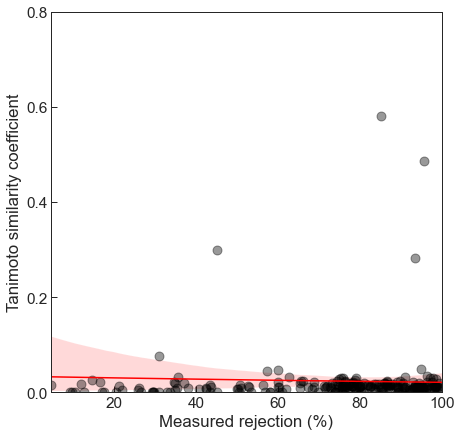

meta NOT subset; don't know how to subset; dropped


In [24]:
fig = plt.figure(figsize=(7,7))
fp_list['rej'] = fp_list['rej'].astype('float64')
fp_list['tani'] = fp_list['tani'].astype('float64')

sns.regplot(x='rej', y='tani', data=fp_list, scatter=False, logistic=True, color='r')
plt.scatter(fp_list['rej'], fp_list['tani'], c='k', alpha=0.4, s=80, edgecolors=None)
plt.xlabel('Measured rejection (%)')
plt.ylabel('Tanimoto similarity coefficient')
plt.xlim(np.min(fp_list['rej']),100)
plt.ylim(0,0.8)
plt.yticks(np.arange(0,0.801,0.2))
plt.show()
fig.savefig("fig_similar_urea.pdf", bbox_inches='tight', transparent=True)

In [54]:
ref_df = pd.read_csv('test_temp.csv')
ref_arr = np.array(ref_df.iloc[0][4:])

s_list = []
for i in range(len(ref_arr)):
    s = str(int(ref_arr[i]))
    s_list.append(s)

ref_fp = "".join(s_list)
ref_fp_bitvect = DataStructs.cDataStructs.CreateFromBinaryText(ref_fp)